Load the `ISLR2` and `tidyverse` packages.

In [1]:
library("ISLR2")
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

Plot `mpg`  as a function of `displacement`.

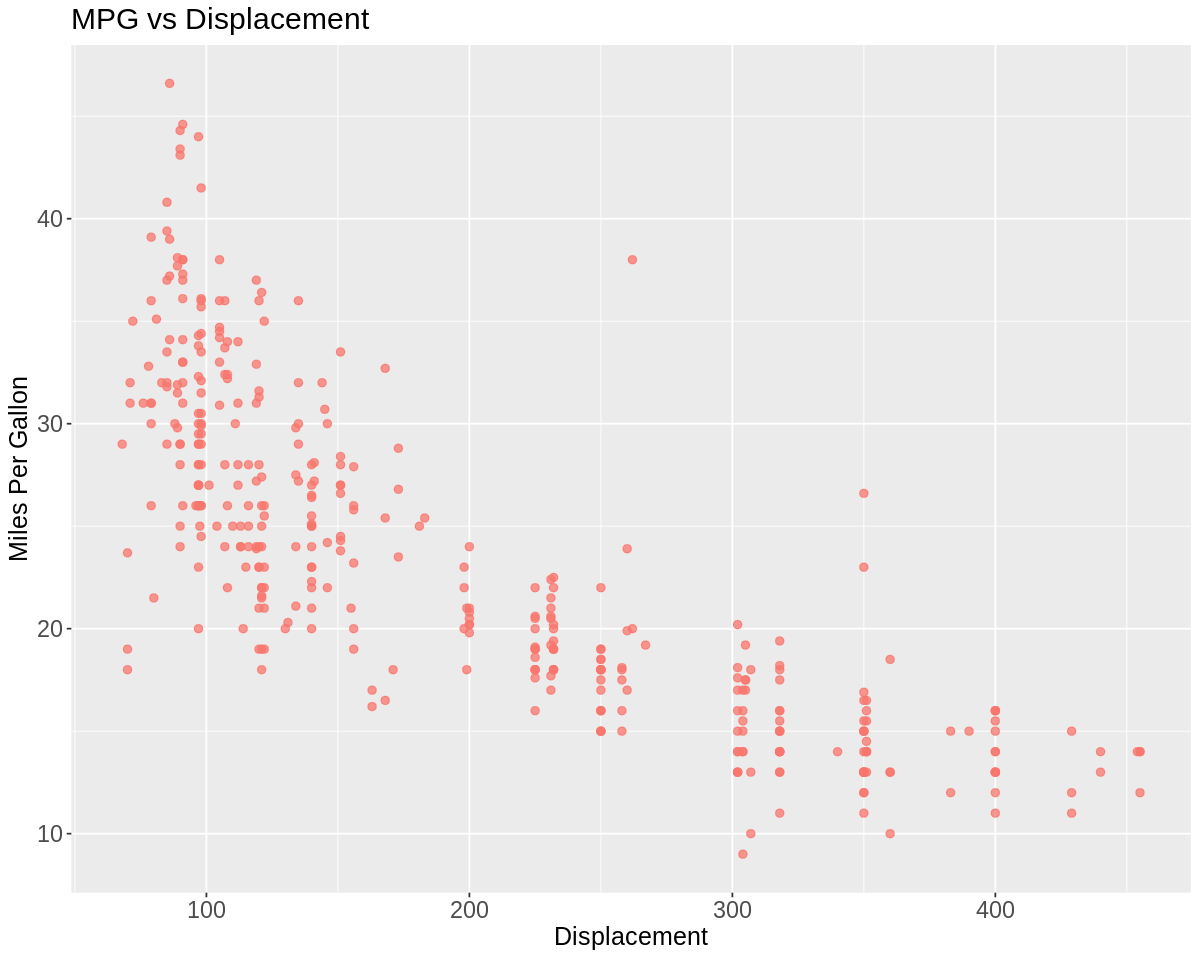

In [2]:
options(repr.plot.width=10,
        repr.plot.height=8)

ggplot(data=Auto, aes(x=displacement, y=mpg, color="crimson")) +
  geom_point(size=2, alpha=0.75) +
  labs(title="MPG vs Displacement",
       x="Displacement",
       y="Miles Per Gallon") +
  theme(legend.position="none",
        title=element_text(size=15),
        axis.text=element_text(size=14))

❓Does the relationship of `mpg` to `displacement` look linear?

The relationship between `mpg` and `displacement` could be modeled linearly for some degree of fit, but quadratic or natural splines regression would likely yield a superior fit. Extrapolating using greater displacement linear regression would likely predict negative `mpg` values, and quadratic regression would likely predict very large `mpg` values, both outcomes being highly unrealistic. Therefore natural splines regression is likely the best choice moving forward with a relatively simple modeling process.

Model `mpg` as a function of `displacement` and `cylinders`.

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [3]:
library("tidymodels")

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



In [4]:
# Define recipe
rec = recipe(mpg ~ displacement + cylinders, data=Auto) |>
  step_ns(displacement, deg_free=3) |>
  step_mutate(cyl_cat = factor(cylinders)) |>
  step_dummy(cyl_cat) |>
  step_rm(cylinders)

# Define engine
mod = linear_reg() |> set_engine("lm")

# Define workflow
wf = workflow() |>
  add_recipe(rec) |>
  add_model(mod)

# Fit workflow
wf_fit = fit(wf, data=Auto)

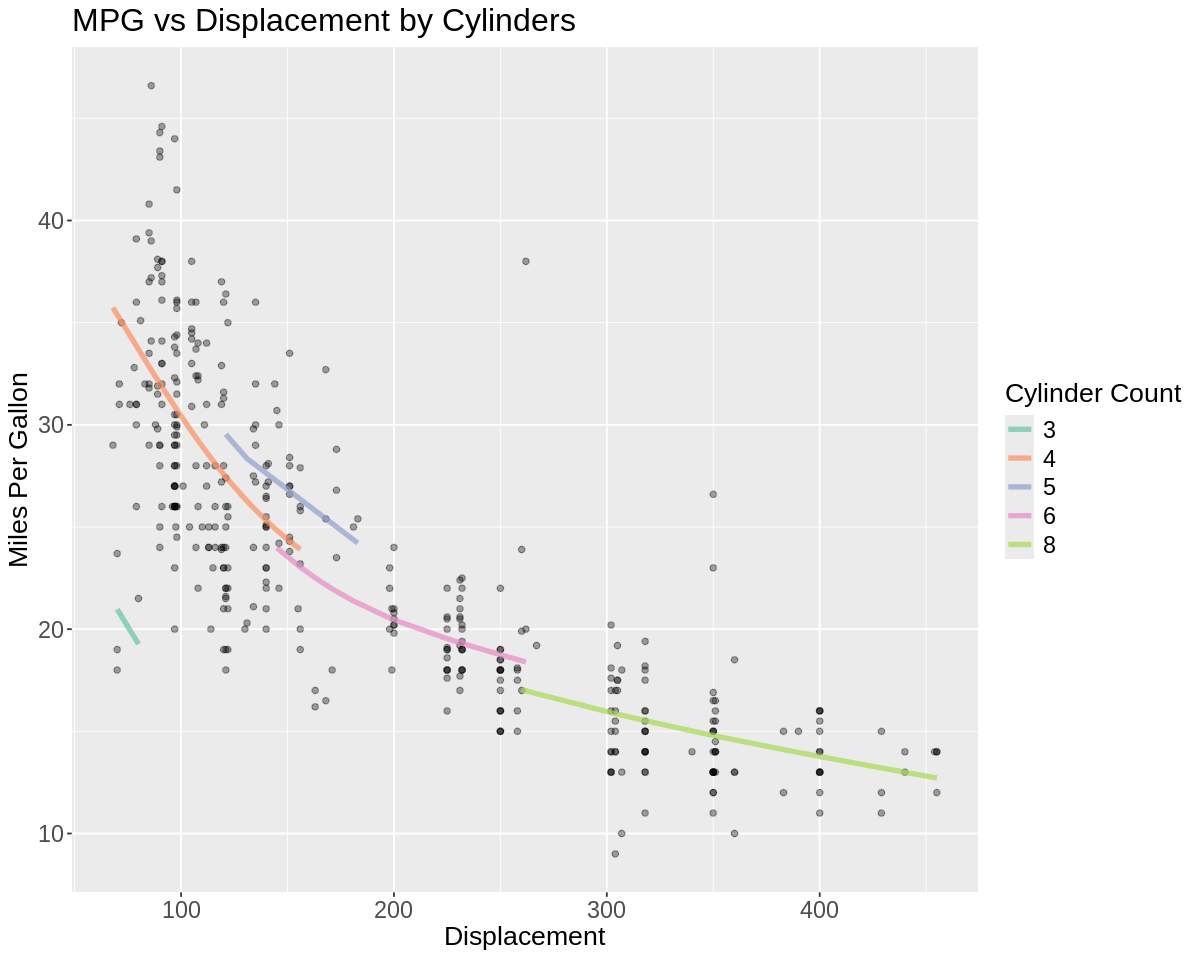

In [5]:
options(repr.plot.width=10,
        repr.plot.height=8)

augment(wf_fit, new_data=Auto) |>
  ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size=1.5, alpha=0.35) +
    geom_line(aes(y=.pred, color=factor(cylinders)), linewidth=1.5, alpha=0.7) +
    labs(title="MPG vs Displacement by Cylinders",
         x="Displacement",
         y="Miles Per Gallon",
         color="Cylinder Count") +
    scale_color_brewer(palette="Set2") +
    theme(title=element_text(size=16),
          axis.text=element_text(size=14),
          legend.text=element_text(size=14))